# Week 7 Assignment

This week we are collecting some data from Reddit and doing some basic EDA on it. You should:

- create your Reddit account and API keys
- collect data from a subreddit of your choice
    - at a minimum, collect the posts from the subreddit; optionally collect comments on the posts
- save the data to a SQLite3 database
- perform some basic EDA on the data
    - create at least 2 plots
- write a short analysis at the end describing the process and results
- turn in the Jupyter Notebook and PDF printout or export to the week 7 dropbox

***Optional* advanced section**
- Practice SQL queries and select a subsection of the posts you collected
- Modify your code to collect data beyond the 1000 item limit
- Collect comments from the posts for analysis next week and do some EDA on the comments (e.g. who is the top commenter, which commenters have the most up and down votes or most controversial posts, etc)
- examine n-grams ([bigrams](https://stackoverflow.com/a/37651184/4549682), trigrams) or [collocations](https://www.geeksforgeeks.org/nlp-word-collocations/)

Note: There is no solution file for this week.

#### Reddit account :

![reddit image](reddit.png)

#### Install and Load Packages :

In [ ]:
%pip install -r requirements.txt

In [3]:
import praw
import pandas as pd
import credentials

#### API keys :

`client_id`, `client_secret`, and `user_agent` are saved in`credentials.py` file. The `import credentials` line will help to access this variables.

Initialize reddit connection with credentials :

In [4]:
reddit = praw.Reddit(client_id=credentials.client_id,
                     client_secret=credentials.client_secret,
                     user_agent=credentials.user_agent)

#### Data from a subreddit :

In [5]:
yellowstone_subreddit = reddit.subreddit('yellowstone').hot(limit=10)

- Reddit subreddit returns object as generator which means it yeilds value one at a time.
- It generates values on demand.
- Its memory efficient because it does not store all values at a time in memory.

Hence we can itterate over it and access values:

In [6]:
for post in yellowstone_subreddit:
    print(post.title, post.score)

Dug up some more shots from Avalanche 14
Concerned residents near Yellowstone National Park organizing to save National Park Service jobs 1432
Binoculars 4
Up on Avalanche 73
Looking to visit in May! 0
Best route from South Entrance to Mammoth? 8
Boots?! 3
Visiting 0
Coyotes 425
Is West Yellowstone worth visiting? 9


Now again if we want to access the elements :

In [7]:
list(yellowstone_subreddit)

[]

generator values are gone. because we accessed them.

But post keyword still have last generator values. we can directly access them like below:

In [8]:
print(post)
print(post.score)
print(post.title)
print(post.permalink)

1j2sas3
9
Is West Yellowstone worth visiting?
/r/yellowstone/comments/1j2sas3/is_west_yellowstone_worth_visiting/


Now we can create dictonary of this information which can easily drop into pandas dataframe.

In [9]:
reddit_dict = {
    'title': [],
    'score': [],
    'permalink': [],
    'comments': [],
    'n_comments': []
}

yellowstone_subreddit = reddit.subreddit('yellowstone').hot(limit=10)

for post in list(yellowstone_subreddit): 
    reddit_dict['title'].append(post.title)
    reddit_dict['score'].append(post.score) 
    reddit_dict['permalink'].append(post.permalink)
    comment_list = []
    for comment in post.comments.list():
        comment_list.append(comment.body)
    reddit_dict['comments'].append(comment_list)
    reddit_dict['n_comments'].append(post.num_comments)
    
yellowstone_df = pd.DataFrame(reddit_dict)
print(yellowstone_df.head(5).to_string(index=False, justify="left"))

title                                                                                             score permalink                                                                      comments                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

#### Saving the data to a SQLite3 database :

Sqlite3 is built-in with Python, and saves the data to a file on our hard drive.

In [10]:
import sqlite3

yellowstone_df = yellowstone_df.astype(str) 

con = sqlite3.connect("data/co_reddit.sqlite")
yellowstone_df.to_sql('posts', con, if_exists='replace', index=False)

10

We can load data from sqlite3 by using sql query 

In [11]:
yellowstone_df_check = pd.read_sql_query('SELECT * FROM posts;', con)
con.close()
yellowstone_df_check

,title,score,permalink,comments,n_comments
0,Dug up some more shots from Avalanche,14,/r/yellowstone/comments/1j4e110/dug_up_some_mo...,['Those painted rocks are so tacky. People nee...,7
1,Concerned residents near Yellowstone National ...,1431,/r/yellowstone/comments/1j3gyfd/concerned_resi...,['Pew reported that 75% of republican voters h...,28
2,Binoculars,4,/r/yellowstone/comments/1j4d5jo/binoculars/,['Vortex Diamondback 10×42. Should be less tha...,14
3,Up on Avalanche,72,/r/yellowstone/comments/1j3u1x7/up_on_avalanche/,"['One of my favorite places.', 'Thanks for sha...",7
4,Looking to visit in May!,0,/r/yellowstone/comments/1j4dvqc/looking_to_vis...,['It’s still crowded in May (took us about 45 ...,4
5,Best route from South Entrance to Mammoth?,8,/r/yellowstone/comments/1j3o5px/best_route_fro...,"[""which is faster will be impossible to say, c...",11
6,Boots?!,3,/r/yellowstone/comments/1j3qja4/boots/,['I have a pair of Danners that are super stur...,39
7,Visiting,0,/r/yellowstone/comments/1j3kw58/visiting/,"[""Make lodging reservations now as they book m...",18
8,Coyotes,428,/r/yellowstone/comments/1j29c99/coyotes/,['Wow that dual howling picture is incredible!...,5
9,Is West Yellowstone worth visiting?,11,/r/yellowstone/comments/1j2sas3/is_west_yellow...,['The ONLY reason I would say yes is if you de...,29


#### Basic EDA on the data :

Histogram for the score column :

<Axes: ylabel='Frequency'>

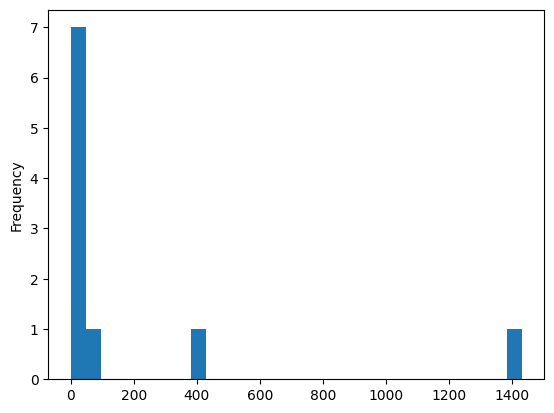

In [12]:
yellowstone_df['score'] = pd.to_numeric(yellowstone_df['score'], errors='coerce')
yellowstone_df['score'].plot.hist(bins=30)

Scatter plot which shows relationship between score and number of comments column :

<Axes: xlabel='score', ylabel='n_comments'>

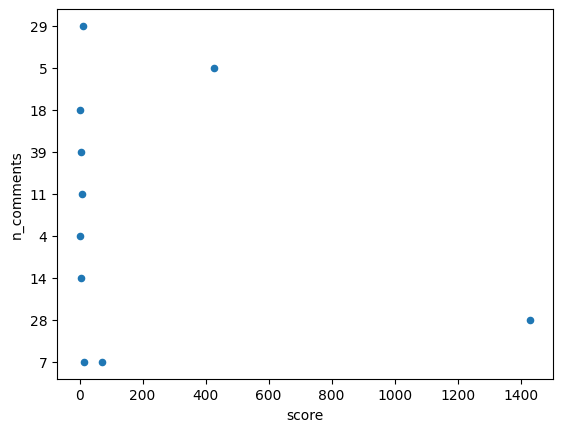

In [13]:
yellowstone_df.plot.scatter(x='score', y='n_comments')

Word Cloud is a visualization technique used to display the most frequently occurring words in a text dataset.

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

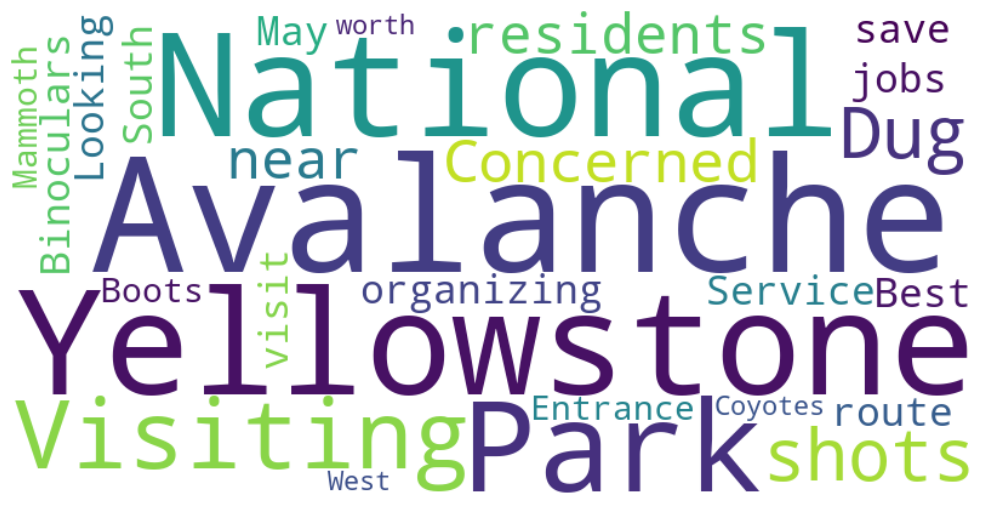

In [17]:
text_data = ' '.join(yellowstone_df['title'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

TextBlob library in Python is used for Natural Language Processing (NLP), including sentiment analysis.

0    0.194697
1    0.046273
2    0.153113
3    0.226667
4    0.049735
5    0.152355
6    0.222524
7    0.240971
8    0.564286
9    0.161334
Name: Sentiment, dtype: float64


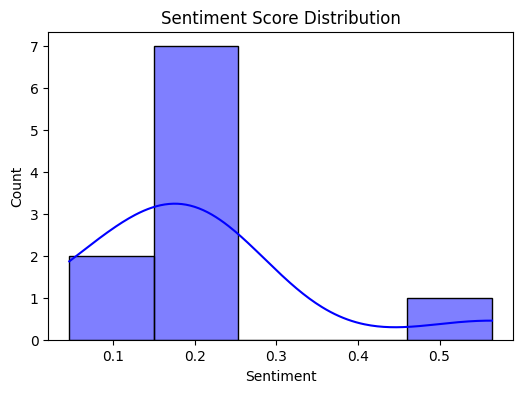

In [ ]:
from textblob import TextBlob
import seaborn as sns

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

yellowstone_df['Sentiment'] = yellowstone_df['comments'].apply(get_sentiment)
print(yellowstone_df['Sentiment'])

plt.figure(figsize=(6, 4))
sns.histplot(yellowstone_df['Sentiment'], bins=5, kde=True, color="blue")
plt.title("Sentiment Score Distribution")
plt.show()

The polarity score is a value between -1 and 1. -1 means negative and 1 means very postitive. Our Histogram shows values are related to 0. Hence comments are natural.

# Analysis

- Creation of account on reddit and save credentials in private file is one of the best practice while dealing with third party sources.

- While collecting data from reddit we can get following details for posts:


- 'title': title of the post,
- 'score': the number of upvotes,
- 'permalink': link to the post,
- 'comments': comments array/list,
- 'n_comments': number of people commented on the post

- Reddit subreddit returns object as generator which generates values on demand i.e one at a time. 
- Hence we can collect it in list and then transfer it into data frame.
- For later use we can store data frame data into SQLite3 database.
- Each reddit post will save as row in database table.
- We can load data from database by using SQL query.
- Histogram for score colums shows how scores are distributed.
- Scatter plot for score and number of comments relationship which helps to identify patterns of highly scored posts gets more comments.

- Overall this process helps to identify pattern and trends in reddit actions and user intercations.